# Importing Necessary Libraries

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [128]:
from sklearn.preprocessing import LabelEncoder

In [129]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [130]:
import warnings
warnings.filterwarnings("ignore")

In [131]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score,make_scorer
from sklearn.model_selection import GridSearchCV

# Loading data

In [132]:
data=pd.read_csv("Mall_Customers.csv")
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [133]:
data.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

# Exploratory Data Analysis(EDA)

In [134]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [135]:
data.shape

(200, 5)

In [136]:
# Statistical information about dataset
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [137]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [138]:
data.ndim

2

In [139]:
data.size

1000

In [140]:
data.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [141]:
data.duplicated().any()

False

# Data Analysis/Visualization

Text(0.5, 1.0, 'Distribution Plot of Age')

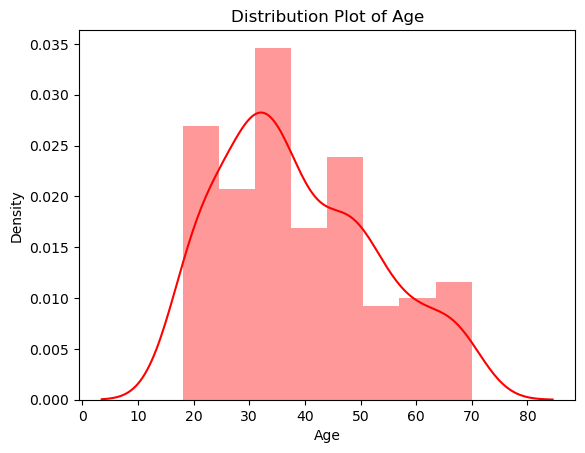

In [142]:
sns.distplot(data['Age'],kde=True,color='red')
plt.title("Distribution Plot of Age")


Text(0.5, 1.0, 'Distribution Plot of Annual Income (in K$)')

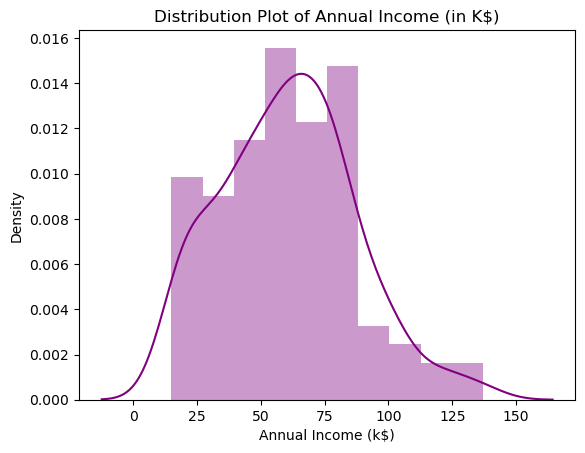

In [143]:
sns.distplot(data['Annual Income (k$)'],kde=True,color='purple')
plt.title("Distribution Plot of Annual Income (in K$)")

Text(0.5, 1.0, 'Distribution Plot of Spending Score (1-100)')

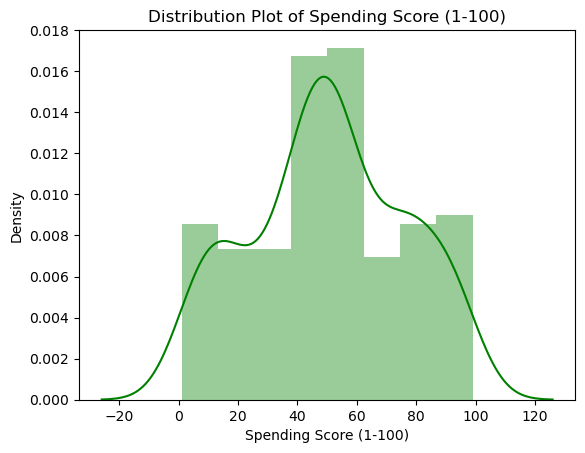

In [144]:
sns.distplot(data['Spending Score (1-100)'],kde=True,color='green')
plt.title("Distribution Plot of Spending Score (1-100)")

Text(0.5, 1.0, 'Countplot of Gender')

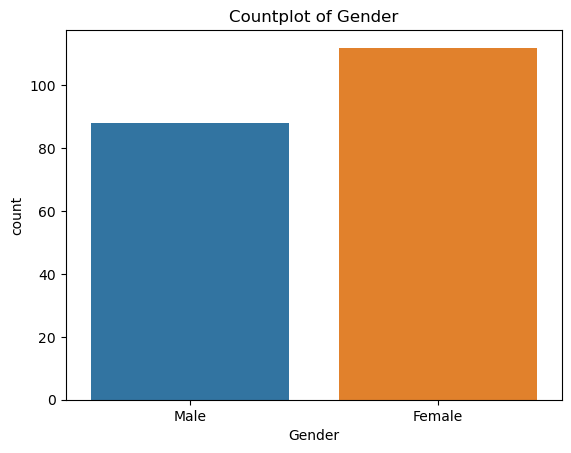

In [145]:
sns.countplot(data=data,x='Gender')
plt.title("Countplot of Gender")

[Text(0.5, 1.0, 'Boxplot for Spending Score')]

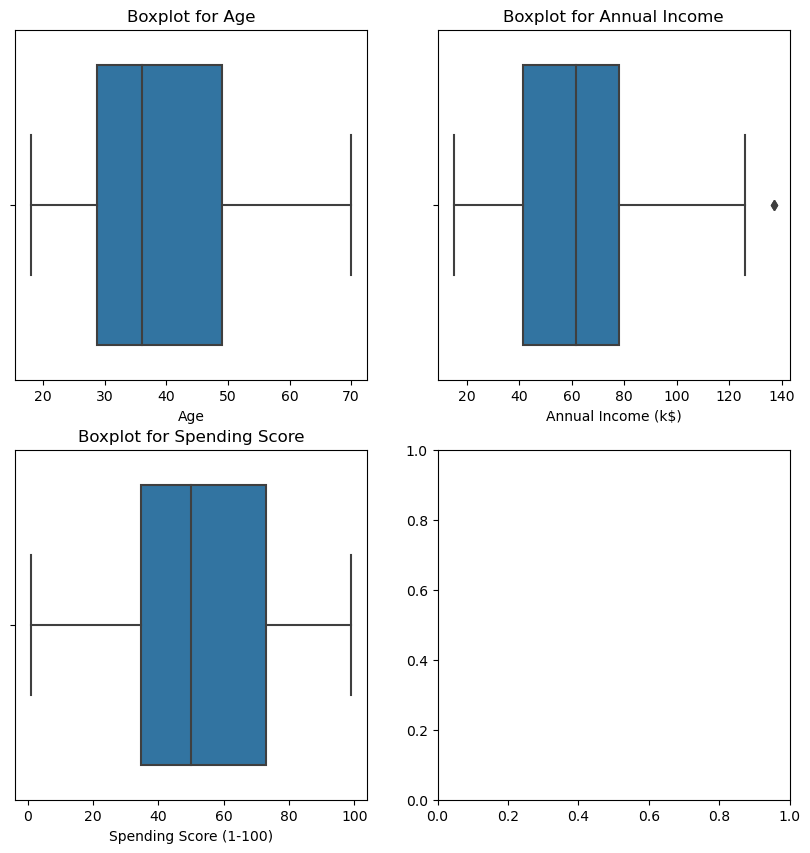

In [146]:
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

sns.boxplot(x=data['Age'], ax=axes[0,0]).set(title='Boxplot for Age')
sns.boxplot(x=data['Annual Income (k$)'], ax=axes[0,1]).set(title='Boxplot for Annual Income')
sns.boxplot(x=data['Spending Score (1-100)'], ax=axes[1,0]).set(title='Boxplot for Spending Score')

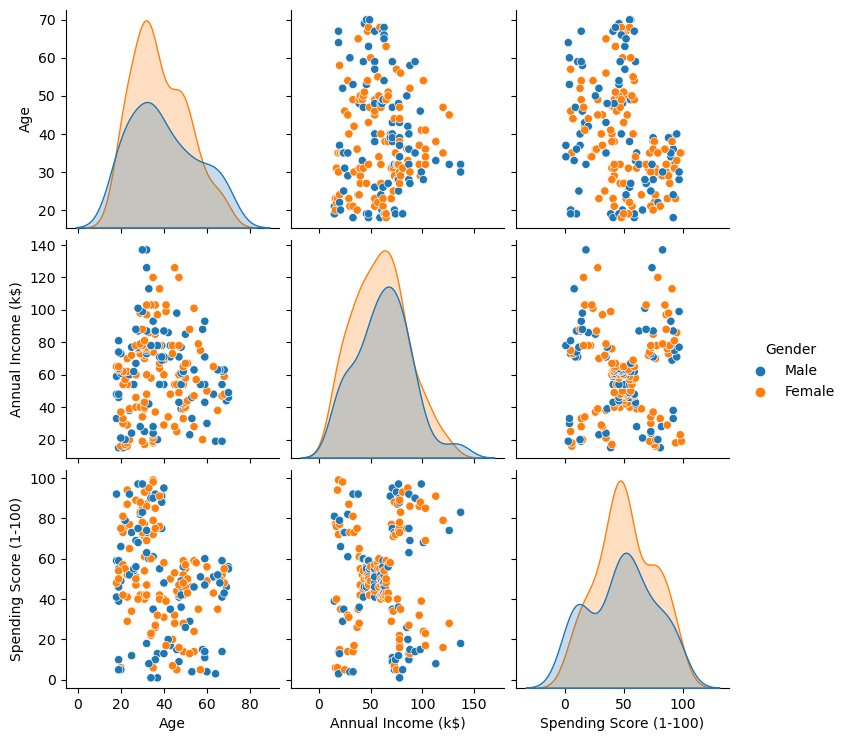

In [147]:
sns.pairplot(data.drop('CustomerID', axis=1),hue='Gender')

Text(0, 0.5, 'Number of Customers')

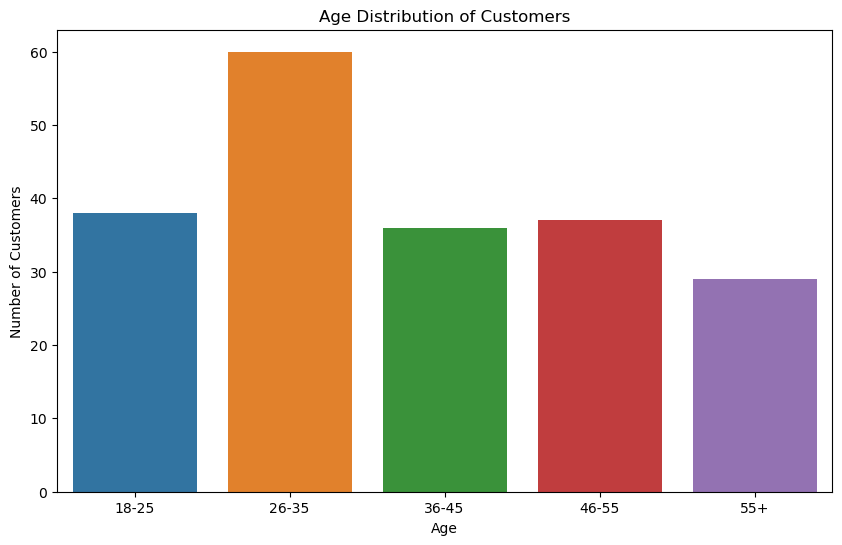

In [148]:
#Age Distribution of Customers
age_18_25=data.Age[(data.Age>=18) & (data.Age<=25)]
age_26_35=data.Age[(data.Age>=26) & (data.Age<=35)]
age_36_45=data.Age[(data.Age>=36) & (data.Age<=45)]
age_46_55=data.Age[(data.Age>=46) & (data.Age<=55)]
age_55above=data.Age[(data.Age>=56)]

agex=["18-25","26-35","36-45","46-55","55+"]
agey=[len(age_18_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_55above.values)]

plt.figure(figsize=(10,6))
sns.barplot(x=agex,y=agey)
plt.title("Age Distribution of Customers")
plt.xlabel("Age")
plt.ylabel("Number of Customers")

# Elbow method to find optimal number of clusters

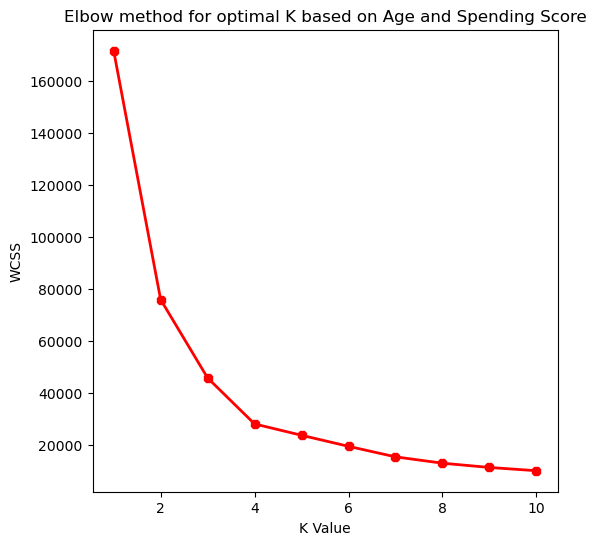

In [149]:
#Calculating optimal number of clusters for a combination of Age and Spending Score using Sum of Squares Method
x1=data.loc[::,["Age","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,6))
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow method for optimal K based on Age and Spending Score")
plt.show()

In [150]:
#Printing Clusters and their Centroid for k=4
kmeans=KMeans(n_clusters=4)
clusters=kmeans.fit_predict(x1)
print("Clusters")
print(clusters)
print("-----------------------------------------------------")
print("Cluster Centroids")
print(kmeans.cluster_centers_)

Clusters
[3 1 2 1 3 1 2 1 2 1 2 1 2 1 2 1 3 3 2 1 3 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2
 1 2 1 0 1 0 3 2 3 0 3 3 3 0 3 3 0 0 0 0 0 3 0 0 3 0 0 0 3 0 0 3 3 0 0 0 0
 0 3 0 3 3 0 0 3 0 0 3 0 0 3 3 0 0 3 0 3 3 3 0 3 0 3 3 0 0 3 0 3 0 0 0 0 0
 3 3 3 3 3 0 0 0 0 3 3 3 1 3 1 0 1 2 1 2 1 3 1 2 1 2 1 2 1 2 1 3 1 2 1 0 1
 2 1 2 1 2 1 2 1 2 1 2 1 0 1 2 1 2 1 2 1 2 3 2 1 2 1 2 1 2 1 2 1 2 1 2 1 3
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1]
-----------------------------------------------------
Cluster Centroids
[[55.70833333 48.22916667]
 [30.1754386  82.35087719]
 [43.29166667 15.02083333]
 [27.61702128 49.14893617]]


Text(0, 0.5, 'Spending Score')

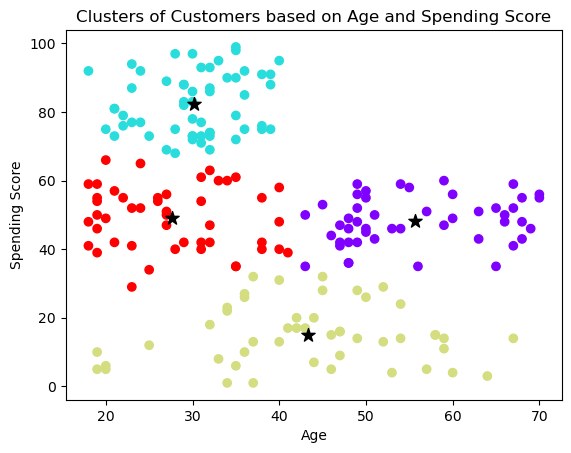

In [151]:
#Clusters of Customers based on Age and Spending Score
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black",marker="*",s=100)
plt.title("Clusters of Customers based on Age and Spending Score")
plt.xlabel("Age")
plt.ylabel("Spending Score")

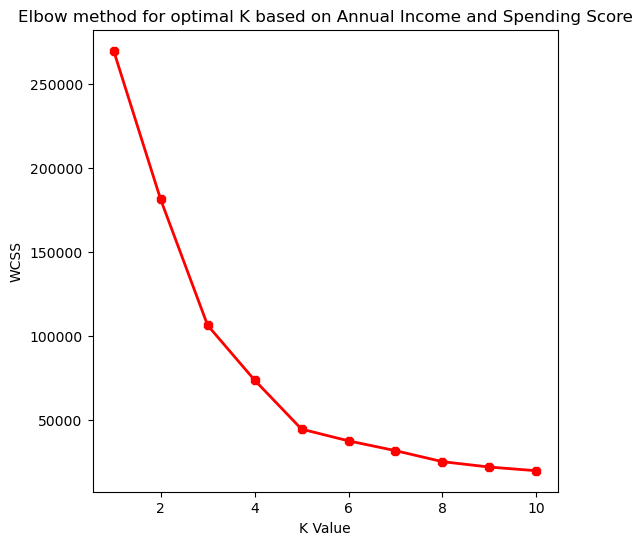

In [152]:
#Calculating optimal number of clusters for a combination of Annual Income and Spending Score using Sum of Squares Method
x2=data.loc[::,["Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x2)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,6))
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.title("Elbow method for optimal K based on Annual Income and Spending Score")
plt.show()

In [153]:
#Printing Clusters and their Centroid for k=5
kmeans=KMeans(n_clusters=5)
clusters=kmeans.fit_predict(x2)
print("Clusters")
print(clusters)
print("-----------------------------------------------------")
print("Cluster Centers")
print(kmeans.cluster_centers_)

Clusters
[0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 1 0 2 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 4 3 4 2 4 3 4 3 4 2 4 3 4 3 4 3 4 3 4 2 4 3 4 3 4
 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3
 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4]
-----------------------------------------------------
Cluster Centers
[[26.30434783 20.91304348]
 [25.72727273 79.36363636]
 [55.2962963  49.51851852]
 [88.2        17.11428571]
 [86.53846154 82.12820513]]


Text(0, 0.5, 'Spending Score')

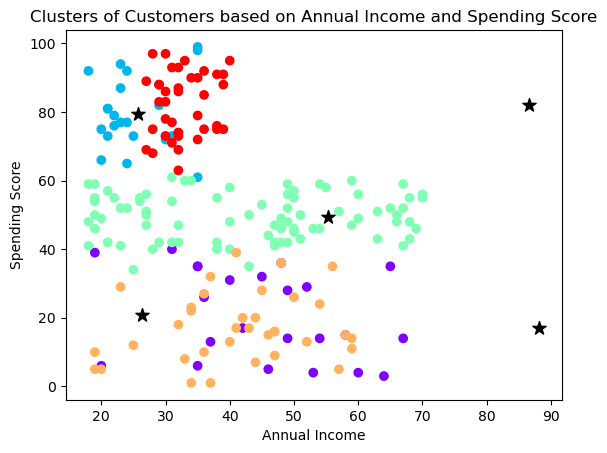

In [154]:
#Clusters of Customers based on Annual Income and Spending Score
plt.scatter(x1[:,0],x1[:,1],c=kmeans.labels_,cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],color="black",marker="*",s=100)
plt.title("Clusters of Customers based on Annual Income and Spending Score")
plt.xlabel("Annual Income")
plt.ylabel("Spending Score")

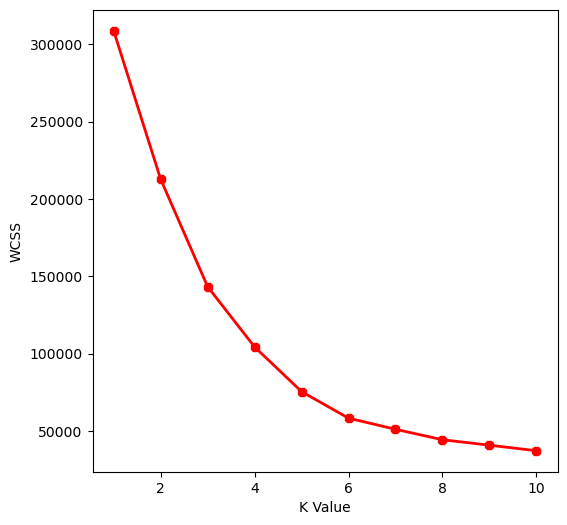

In [155]:
#Calculating optimal number of clusters for a combination of Age, Annual Income and Spending Score using Sum of Squares Method
x3=data.loc[::,["Age","Annual Income (k$)","Spending Score (1-100)"]].values
from sklearn.cluster import KMeans
wcss=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(x3)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(6,6))
plt.plot(range(1,11),wcss,linewidth=2,color='red',marker="8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()


In [156]:
#Printing Clusters and their Centroid for k=5
kmeans=KMeans(n_clusters=5)
clusters=kmeans.fit_predict(x3)
print("Clusters")
print(clusters)
print("-------------------------------------")
print("Cluster Centers")
print(kmeans.cluster_centers_)

Clusters
[0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 1 3 1 4 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 4 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]
-------------------------------------
Cluster Centers
[[45.2173913  26.30434783 20.91304348]
 [32.69230769 86.53846154 82.12820513]
 [25.52173913 26.30434783 78.56521739]
 [40.66666667 87.75       17.58333333]
 [43.08860759 55.29113924 49.56962025]]


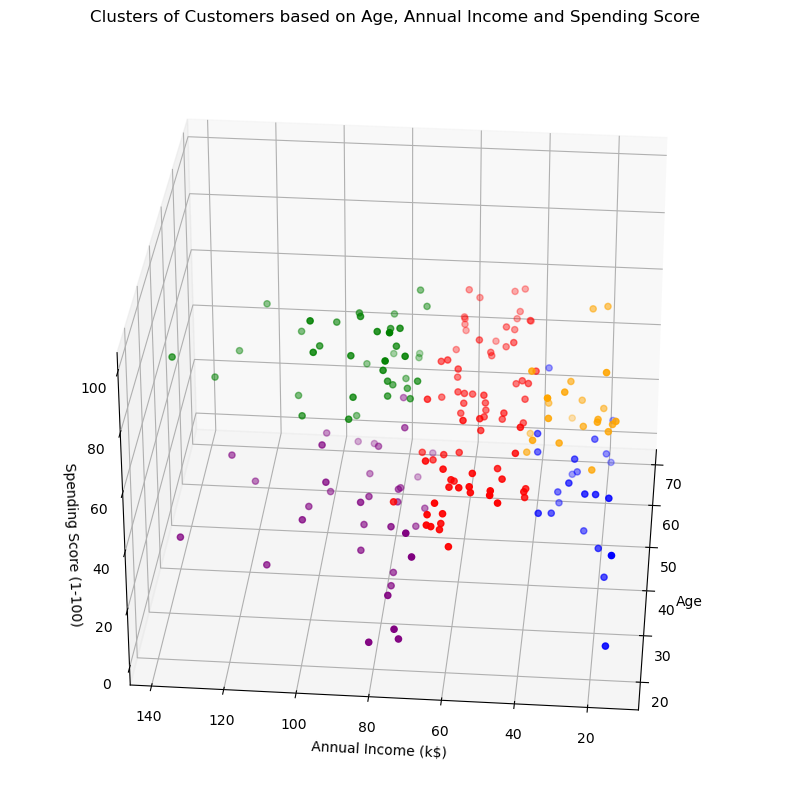

In [157]:
data['label']=clusters

from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure(figsize=(10,10))
ax=fig.add_subplot(111,projection='3d')

ax.scatter(data.Age[data.label==0],data["Annual Income (k$)"][data.label==0],data["Spending Score (1-100)"][data.label==0],c='blue')
ax.scatter(data.Age[data.label==1],data["Annual Income (k$)"][data.label==1],data["Spending Score (1-100)"][data.label==1],c='green')
ax.scatter(data.Age[data.label==2],data["Annual Income (k$)"][data.label==2],data["Spending Score (1-100)"][data.label==2],c='orange')
ax.scatter(data.Age[data.label==3],data["Annual Income (k$)"][data.label==3],data["Spending Score (1-100)"][data.label==3],c='purple')
ax.scatter(data.Age[data.label==4],data["Annual Income (k$)"][data.label==4],data["Spending Score (1-100)"][data.label==4],c='red')
ax.view_init(30,185)

plt.xlabel("Age")
plt.ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
plt.title("Clusters of Customers based on Age, Annual Income and Spending Score")
plt.show()

In [158]:
import numpy as np
data.drop(['Gender'], axis=1 ,inplace=True)

In [159]:
scaler = StandardScaler()
data = scaler.fit_transform(data)

# Data Evaluation

In [160]:
data, _ = make_blobs(n_samples=300,  random_state=42)

In [161]:
# Create and fit the KMeans model
kmeans_model = KMeans(n_clusters=5, random_state=42)
kmeans_model.fit(data)

KMeans(n_clusters=5, random_state=42)

In [162]:
# Predict clusters and find centroids
y_kmeans = kmeans_model.predict(data)
centroids = kmeans_model.cluster_centers_

Text(0.5, 1.0, 'K-Means Clustering')

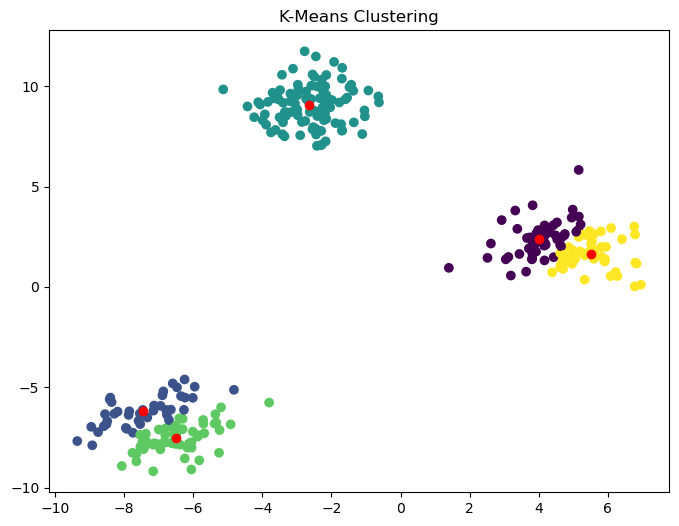

In [163]:
# Visualize clusters and centroids
plt.figure(figsize=(8, 6))

# Plot data points with different colors based on their cluster assignments
plt.scatter(data[:, 0], data[:, 1], c=y_kmeans )

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', c='red')

plt.title('K-Means Clustering')

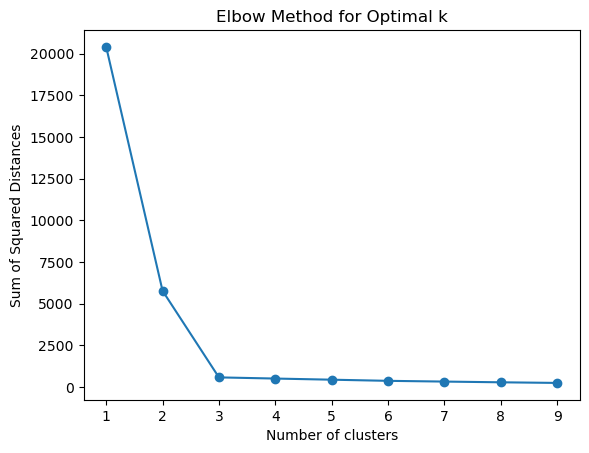

In [164]:
sse=[]
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    sse.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(range(1, 10), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method for Optimal k')
plt.show()

In [165]:
inertia = kmeans_model.inertia_
print("Inertia:", inertia)

Inertia: 429.7821010430648


In [166]:
# Silhouette Score
silhouette_avg = silhouette_score(data, y_kmeans)
print("Silhouette Score:", silhouette_avg)

Silhouette Score: 0.501403768738471


In [167]:
# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(data, y_kmeans)
print("Calinski-Harabasz Index:", ch_index)

Calinski-Harabasz Index: 3427.263418227586


In [168]:
#Davies-Bouldin Index
db_index = davies_bouldin_score(data, y_kmeans)
print("Davies-Bouldin Index:", db_index)

Davies-Bouldin Index: 0.9801546309366558


In [169]:
# Define a range of K values to try
param_grid = {'n_clusters': [ 4, 5, 6]}
# Create KMeans model
kmeans_model = KMeans(random_state=42)
# Perform grid search using silhouette score as the scoring metric
grid_search = GridSearchCV(kmeans_model, param_grid, cv=5, scoring=make_scorer(silhouette_score))
grid_search.fit(data)

GridSearchCV(cv=5, estimator=KMeans(random_state=42),
             param_grid={'n_clusters': [4, 5, 6]},
             scoring=make_scorer(silhouette_score))

In [170]:
# Get the best K value
best_k = grid_search.best_params_['n_clusters']
best_k

4

In [171]:
# Train the KMeans model with the best K value
best_kmeans_model = KMeans(n_clusters=best_k, random_state=42)
best_kmeans_model.fit(data)

KMeans(n_clusters=4, random_state=42)

In [172]:
# Predict clusters
y_kmeans = best_kmeans_model.predict(data)
# Evaluate clustering performance using the best K value
silhouette_avg = silhouette_score(data, y_kmeans)
print("Best K:", best_k)
print("Silhouette Score:", silhouette_avg)

Best K: 4
Silhouette Score: 0.6629719803670588


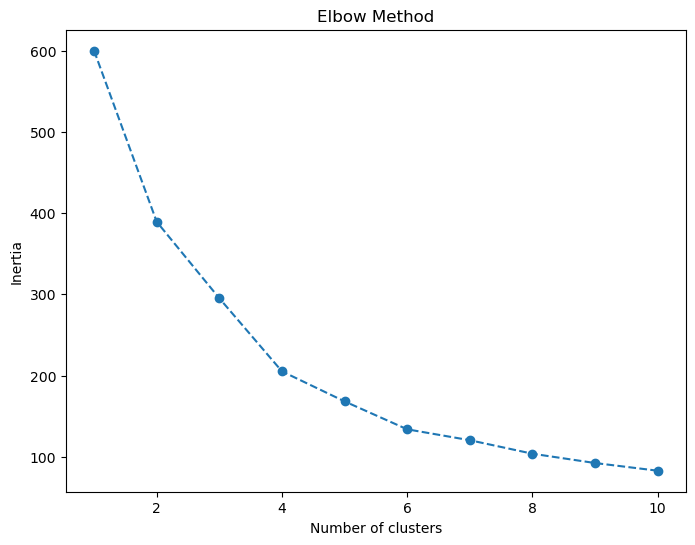

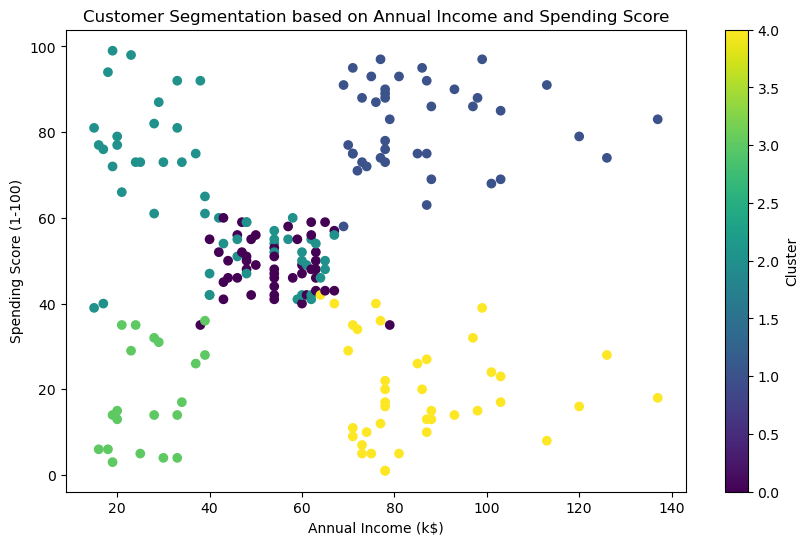

         CustomerID        Age  Annual Income (k$)  Spending Score (1-100)
Cluster                                                                   
0         83.872340  55.638298           54.382979               48.851064
1        161.025000  32.875000           86.100000               81.525000
2         55.648148  25.185185           41.092593               62.240741
3         24.100000  46.250000           26.750000               18.350000
4        159.743590  39.871795           86.102564               19.358974


In [174]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Step 1: Load and Preprocess Data
data = pd.read_csv("Mall_Customers.csv")  # Load your dataset
# Preprocess your data if necessary (e.g., handling missing values, encoding categorical variables)

# Step 2: Feature Selection
selected_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[selected_features]

# Step 3: Scaling Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 4: Determine Optimal Number of Clusters
# Use the Elbow Method to find the optimal number of clusters
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='--')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

# Step 5: Apply K-Means Clustering
# Based on the Elbow Method, choose the optimal number of clusters
k = 5  # Example: You can choose the number of clusters based on the Elbow Method
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

# Step 6: Visualize Clusters
plt.figure(figsize=(10, 6))
plt.scatter(X['Annual Income (k$)'], X['Spending Score (1-100)'], c=kmeans.labels_, cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation based on Annual Income and Spending Score')
plt.colorbar(label='Cluster')
plt.show()

# Step 7: Interpret and Analyze Results
# Add cluster labels to the original data
data['Cluster'] = kmeans.labels_

# Analyze the characteristics of each cluster
cluster_summary = data.groupby('Cluster').mean()
print(cluster_summary)


# GUI

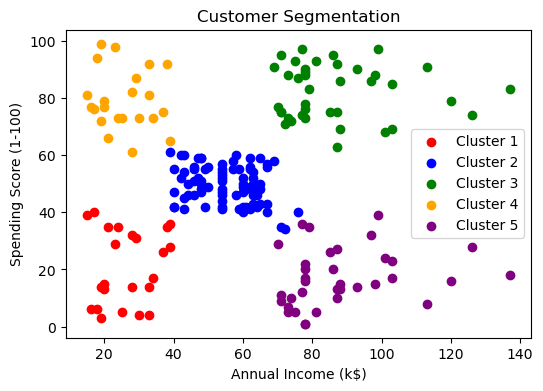

In [9]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class CustomerSegmentationApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Customer Segmentation App")
        self.root.geometry("600x400")

        self.df = None

        self.load_data_button = tk.Button(root, text="Load Data", command=self.load_data)
        self.load_data_button.pack(pady=10)

        self.segment_button = tk.Button(root, text="Segment Customers", command=self.segment_customers)
        self.segment_button.pack(pady=10)

        self.plot_canvas = None

    def load_data(self):
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        if file_path:
            self.df = pd.read_csv(file_path)
            messagebox.showinfo("Success", "Data loaded successfully!")

    def segment_customers(self):
        if self.df is not None:
            X = self.df[['Annual Income (k$)', 'Spending Score (1-100)']]
            kmeans = KMeans(n_clusters=5)
            self.df['Cluster'] = kmeans.fit_predict(X)
            self.plot_clusters()
        else:
            messagebox.showerror("Error", "No data loaded!")

    def plot_clusters(self):
        if self.plot_canvas:
            self.plot_canvas.get_tk_widget().pack_forget()

        fig, ax = plt.subplots(figsize=(6, 4))
        colors = ['red', 'blue', 'green', 'orange', 'purple']
        for i in range(5):
            cluster_data = self.df[self.df['Cluster'] == i]
            ax.scatter(cluster_data['Annual Income (k$)'], cluster_data['Spending Score (1-100)'],
                       c=colors[i], label=f'Cluster {i+1}')

        ax.set_xlabel('Annual Income (k$)')
        ax.set_ylabel('Spending Score (1-100)')
        ax.set_title('Customer Segmentation')
        ax.legend()
        
        self.plot_canvas = FigureCanvasTkAgg(fig, master=self.root)
        self.plot_canvas.draw()
        self.plot_canvas.get_tk_widget().pack()

if __name__ == "__main__":
    root = tk.Tk()
    app = CustomerSegmentationApp(root)
    root.mainloop()
